# Make Logbook of Trim images of CTIO Data
==================================================================================================

- author : Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS, France
- date   : Juin 16 2016


In [44]:
%%javascript
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "theNotebook = " + "'"+thename+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [45]:
print(theNotebook)

MakeLogBook


In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits
from astropy.table import Table, Column
import re
import os

In [47]:
import pandas as pd

In [48]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## Location of trim images
----------------------------------

In [49]:
rootpath_rawimage="../OverScanRemove/trim_images"
MIN_IMGNUMBER=74
MAX_IMGNUMBER=108
object_name='HD111980_May_31th'
SelectTagRe='^trim_20170531_([0-9]+).fits$' # regular expression to select the file
SearchTagRe='^trim_20170531_[0-9]+.fits$'
NBIMGPERLROW=4

In [50]:
#rootpath_rawimage="/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIOData2016/November2016/mucol"
#object_name='mucol'
infos='ctio31may2017'

In [51]:
logfile='logbk_'+object_name+'_'+infos+'.fits'
pandaslogfile='logbk_'+object_name+'_'+infos+'.csv'

In [52]:
dirlist=[]
dirlist.append(rootpath_rawimage)
dirlist_all=np.array(dirlist)

In [53]:
filelist_all=os.listdir(rootpath_rawimage) 

In [54]:
#dirlist_all.remove('.DS_Store') # reove that file in a mAC
filelist_all

['trim_20170531_001.fits',
 'trim_20170531_002.fits',
 'trim_20170531_003.fits',
 'trim_20170531_004.fits',
 'trim_20170531_005.fits',
 'trim_20170531_006.fits',
 'trim_20170531_007.fits',
 'trim_20170531_008.fits',
 'trim_20170531_009.fits',
 'trim_20170531_010.fits',
 'trim_20170531_011.fits',
 'trim_20170531_012.fits',
 'trim_20170531_013.fits',
 'trim_20170531_014.fits',
 'trim_20170531_015.fits',
 'trim_20170531_016.fits',
 'trim_20170531_017.fits',
 'trim_20170531_018.fits',
 'trim_20170531_019.fits',
 'trim_20170531_020.fits',
 'trim_20170531_023.fits',
 'trim_20170531_024.fits',
 'trim_20170531_025.fits',
 'trim_20170531_026.fits',
 'trim_20170531_027.fits',
 'trim_20170531_028.fits',
 'trim_20170531_029.fits',
 'trim_20170531_030.fits',
 'trim_20170531_031.fits',
 'trim_20170531_032.fits',
 'trim_20170531_033.fits',
 'trim_20170531_034.fits',
 'trim_20170531_035.fits',
 'trim_20170531_036.fits',
 'trim_20170531_037.fits',
 'trim_20170531_038.fits',
 'trim_20170531_039.fits',
 

In [55]:
indexes_files= [] # global list
filelist_fitsimages= []  # global list

In [56]:
def MakeFileList():
    """
    MakeFileList : Make The List of files to open
    =============
    
    - we select the files which are of interest.
    - In particular select the number range
    
    """
    count=0
    
    for dir in dirlist_all: # loop on directories, one per image   (if necessary)    
            dir_leaf= dir # build the name of leaf directory
            listfiles=os.listdir(dir_leaf) 
            for filename in listfiles:
                if re.search(SearchTagRe,filename):  #example of filename filter
                    str_index=re.findall(SelectTagRe,filename)
                    count=count+1
                    index=int(str_index[0])
                    if index >= MIN_IMGNUMBER and index <= MAX_IMGNUMBER: 
                        indexes_files.append(index)         
                        shortfilename=dir_leaf+'/'+filename
                        filelist_fitsimages.append(shortfilename)
                    
    return

In [57]:
MakeFileList()   # Make the list

In [58]:
indexes_files=np.array(indexes_files)
filelist_fitsimages=np.array(filelist_fitsimages)

In [59]:
indexes_files

array([ 74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,
        87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
       100, 101, 102, 103, 104, 105, 106, 107, 108])

In [60]:
sorted_indexes=np.argsort(indexes_files) # sort the file indexes

In [61]:
sorted_files=filelist_fitsimages[sorted_indexes]

In [62]:
sorted_numbers=indexes_files[sorted_indexes]

In [63]:
sorted_filenames=[]
for file in sorted_files:
    #fullfilename=os.path.join(rootpath_rawimage,file)
    fullfilename=file
    sorted_filenames.append(fullfilename)

In [64]:
sorted_filenames=np.array(sorted_filenames)

In [65]:
sorted_filenames

array(['../OverScanRemove/trim_images/trim_20170531_074.fits',
       '../OverScanRemove/trim_images/trim_20170531_075.fits',
       '../OverScanRemove/trim_images/trim_20170531_076.fits',
       '../OverScanRemove/trim_images/trim_20170531_077.fits',
       '../OverScanRemove/trim_images/trim_20170531_078.fits',
       '../OverScanRemove/trim_images/trim_20170531_079.fits',
       '../OverScanRemove/trim_images/trim_20170531_080.fits',
       '../OverScanRemove/trim_images/trim_20170531_081.fits',
       '../OverScanRemove/trim_images/trim_20170531_082.fits',
       '../OverScanRemove/trim_images/trim_20170531_083.fits',
       '../OverScanRemove/trim_images/trim_20170531_084.fits',
       '../OverScanRemove/trim_images/trim_20170531_085.fits',
       '../OverScanRemove/trim_images/trim_20170531_086.fits',
       '../OverScanRemove/trim_images/trim_20170531_087.fits',
       '../OverScanRemove/trim_images/trim_20170531_088.fits',
       '../OverScanRemove/trim_images/trim_20170531_089

In [66]:
from astropy.io import fits
with fits.open(sorted_filenames[0]) as pf:
    (pf[0].header)

In [67]:
pf[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                 2048                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
OBJECT  = 'HD111980'           / Name of object observed                        
OBSERVER= '        '           / observer                                       
PROPID  = '        '           / Proposal ID                                    
RECID   = 'ct36.20170601.030908' / NOAO Archibe record ID                       
PROPID  = '        '           / Proposal ID                                    
IMAGETYP= 'object  '        

### Build tables for output file

In [68]:
all_headers = []
all_dates = []
all_airmass = []
all_exposures = []
all_ut = []
all_ra = []
all_dec = []
all_epoch = []
all_zenith = []
all_ha = []
all_st = []
all_alt = []
all_focus = []
all_temp = []
all_press = []
all_hum = []
all_windsp = []
all_seeing = []
all_seeingam = []
all_filter1 = []
all_filter2 = []

for idx,file in np.ndenumerate(sorted_filenames):  
    print file
    hdu_list=fits.open(file)
    header=hdu_list[0].header
    date_obs = header['DATE-OBS']
    airmass = float(header['AIRMASS'])
    expo= float(header['EXPTIME'])
    num=indexes_files[idx[0]]
   
   
    ut=header['UT']
    ra=header['RA']
    dec=header['DEC']
    epoch=float(header['EPOCH'])
    zd = float(header['ZD'])
    ha = header['HA']
    st = header['ST']
    alt = float(header['ALT'])
    fcl = float(header['TELFOCUS'])
    temp= float(header['OUTTEMP'])
    press= float(header['OUTPRESS'])
    hum= float(header['OUTHUM'])
    windsp=float(header['WNDSPEED'])
    seeing=float(header['SEEING'])
    seeingam=float(header['SAIRMASS'])
    filter1 = header['FILTER1']
    filter2 = header['FILTER2']
    
    all_dates.append(date_obs)
    all_airmass.append(airmass)
    all_headers.append(header)
    all_exposures.append(expo)
    all_ut.append(ut)
    all_ra.append(ra)
    all_dec.append(dec)
    all_epoch.append(epoch)
    all_zenith.append(zd)
    all_ha.append(ha)
    all_st.append(st)
    all_alt.append(alt)
    all_focus.append(fcl)
    all_temp.append(temp)
    all_press.append(press)
    all_hum.append(hum)
    all_windsp.append(windsp)
    all_seeing.append(seeing)
    all_seeingam.append(seeingam)
    all_filter1.append(filter1)
    all_filter2.append(filter2)

    hdu_list.close()
    

../OverScanRemove/trim_images/trim_20170531_074.fits
../OverScanRemove/trim_images/trim_20170531_075.fits
../OverScanRemove/trim_images/trim_20170531_076.fits
../OverScanRemove/trim_images/trim_20170531_077.fits
../OverScanRemove/trim_images/trim_20170531_078.fits
../OverScanRemove/trim_images/trim_20170531_079.fits
../OverScanRemove/trim_images/trim_20170531_080.fits
../OverScanRemove/trim_images/trim_20170531_081.fits
../OverScanRemove/trim_images/trim_20170531_082.fits
../OverScanRemove/trim_images/trim_20170531_083.fits
../OverScanRemove/trim_images/trim_20170531_084.fits
../OverScanRemove/trim_images/trim_20170531_085.fits
../OverScanRemove/trim_images/trim_20170531_086.fits
../OverScanRemove/trim_images/trim_20170531_087.fits
../OverScanRemove/trim_images/trim_20170531_088.fits
../OverScanRemove/trim_images/trim_20170531_089.fits
../OverScanRemove/trim_images/trim_20170531_090.fits
../OverScanRemove/trim_images/trim_20170531_091.fits
../OverScanRemove/trim_images/trim_20170531_09

In [69]:
len(all_airmass)

35

In [70]:
all_filter1

['RG715',
 'RG715',
 'RG715',
 'RG715',
 'RG715',
 'RG715',
 'RG715',
 'RG715',
 'RG715',
 'RG715',
 'RG715',
 'RG715',
 'RG715',
 'RG715',
 'RG715',
 'RG715',
 'RG715',
 'RG715',
 'RG715',
 'RG715',
 'RG715',
 'RG715',
 'RG715',
 'RG715',
 'RG715',
 'RG715',
 'RG715',
 'RG715',
 'RG715',
 'RG715',
 'RG715',
 'RG715',
 'RG715',
 'RG715',
 'RG715']

## Build outputfile

In [71]:
col_airmass=np.array(all_airmass)
col_number=np.array(indexes_files)
col_date=np.array(all_dates)
col_filename=np.array(filelist_all)
col_exposure=np.array(all_exposures)
col_zenith=np.array(all_zenith)
col_altitude=np.array(all_alt)
col_temperature=np.array(all_temp)
col_pressure=np.array(all_press)
col_humidity=np.array(all_hum)
col_windsp=np.array(all_windsp)
col_seeing=np.array(all_seeing)
col_filter1=np.array(all_filter1)
col_filter2=np.array(all_filter2)

In [72]:
c1 = fits.Column(name='number', format='J', array=col_number)
c2 = fits.Column(name='airmass', format='E', array=col_airmass)
c3 = fits.Column(name='date', format='A50', array=col_date)
c4 = fits.Column(name='filename', format='A30', array=sorted_filenames)
c5 = fits.Column(name='exposure', format='E', array=col_exposure) 
c6 = fits.Column(name='zenith', format='E', array=col_zenith) 
#c7 = fits.Column(name='altitude', format='E', array=col_altitude) 
c8 = fits.Column(name='temperature', format='E', array=col_temperature) 
c9 = fits.Column(name='pressure', format='E', array=col_pressure) 
c10 = fits.Column(name='humidity', format='E', array=col_humidity) 
c11 = fits.Column(name='windspeed', format='E', array=col_windsp) 
c12 = fits.Column(name='seeing', format='E', array=col_seeing) 
c13 = fits.Column(name='filter1', format='A20', array=col_filter1)
c14 = fits.Column(name='filter2', format='A20', array=col_filter2) 

In [73]:
tbhdu = fits.BinTableHDU.from_columns([c1, c2, c3, c4, c5,c6,c8,c9,c10,c11,c12,c13,c14])

In [74]:
tbhdu.writeto(logfile,overwrite=True)

## Convert into Table
---------------------------

In [75]:
thetable= Table(tbhdu.data)

In [76]:
thetable.show_in_notebook()

idx,number,airmass,date,filename,exposure,zenith,temperature,pressure,humidity,windspeed,seeing,filter1,filter2
0,74,1.178,2017-06-01T03:09:08.102,../OverScanRemove/trim_images/,120.0,31.911,11.3,781.0,22.0,21.0,0.963,RG715,Ron400
1,75,1.185,2017-06-01T03:12:00.598,../OverScanRemove/trim_images/,120.0,32.517,11.3,781.0,22.0,21.7,0.963,RG715,Thor300
2,76,1.194,2017-06-01T03:14:53.106,../OverScanRemove/trim_images/,120.0,33.124,11.3,781.0,22.0,21.3,0.963,RG715,HoloPhP
3,77,1.202,2017-06-01T03:17:45.602,../OverScanRemove/trim_images/,240.0,33.733,11.4,781.0,22.0,21.9,1.19,RG715,HoloPhAg
4,78,1.217,2017-06-01T03:22:38.101,../OverScanRemove/trim_images/,240.0,34.768,11.4,781.0,22.0,21.7,1.346,RG715,HoloAmAg
5,79,1.232,2017-06-01T03:27:30.598,../OverScanRemove/trim_images/,120.0,35.806,11.2,781.0,22.0,19.9,1.67,RG715,Ron400
6,80,1.242,2017-06-01T03:30:23.095,../OverScanRemove/trim_images/,120.0,36.42,11.5,781.0,22.0,21.9,1.702,RG715,Thor300
7,81,1.252,2017-06-01T03:33:15.601,../OverScanRemove/trim_images/,120.0,37.034,11.7,781.0,22.0,22.1,1.702,RG715,HoloPhP
8,82,1.262,2017-06-01T03:36:08.102,../OverScanRemove/trim_images/,240.0,37.65,12.0,781.0,21.0,21.6,1.702,RG715,HoloPhAg
9,83,1.28,2017-06-01T03:41:00.600,../OverScanRemove/trim_images/,240.0,38.695,11.5,781.0,21.0,17.9,1.001,RG715,HoloAmAg


## Read the logfile into a Table
---------------------------------------

In [77]:
print logfile

logbk_HD111980_May_31th_ctio31may2017.fits


In [78]:
t = Table.read(logfile)

In [79]:
t

number,airmass,date,filename,exposure,zenith,temperature,pressure,humidity,windspeed,seeing,filter1,filter2
int32,float32,str50,str30,float32,float32,float32,float32,float32,float32,float32,str20,str20
74,1.178,2017-06-01T03:09:08.102,../OverScanRemove/trim_images/,120.0,31.911,11.3,781.0,22.0,21.0,0.963,RG715,Ron400
75,1.185,2017-06-01T03:12:00.598,../OverScanRemove/trim_images/,120.0,32.517,11.3,781.0,22.0,21.7,0.963,RG715,Thor300
76,1.194,2017-06-01T03:14:53.106,../OverScanRemove/trim_images/,120.0,33.124,11.3,781.0,22.0,21.3,0.963,RG715,HoloPhP
77,1.202,2017-06-01T03:17:45.602,../OverScanRemove/trim_images/,240.0,33.733,11.4,781.0,22.0,21.9,1.19,RG715,HoloPhAg
78,1.217,2017-06-01T03:22:38.101,../OverScanRemove/trim_images/,240.0,34.768,11.4,781.0,22.0,21.7,1.346,RG715,HoloAmAg
79,1.232,2017-06-01T03:27:30.598,../OverScanRemove/trim_images/,120.0,35.806,11.2,781.0,22.0,19.9,1.67,RG715,Ron400
80,1.242,2017-06-01T03:30:23.095,../OverScanRemove/trim_images/,120.0,36.42,11.5,781.0,22.0,21.9,1.702,RG715,Thor300
81,1.252,2017-06-01T03:33:15.601,../OverScanRemove/trim_images/,120.0,37.034,11.7,781.0,22.0,22.1,1.702,RG715,HoloPhP
82,1.262,2017-06-01T03:36:08.102,../OverScanRemove/trim_images/,240.0,37.65,12.0,781.0,21.0,21.6,1.702,RG715,HoloPhAg


## Convert into pandas to plot
---------------------------------------

In [80]:
df = t.to_pandas()

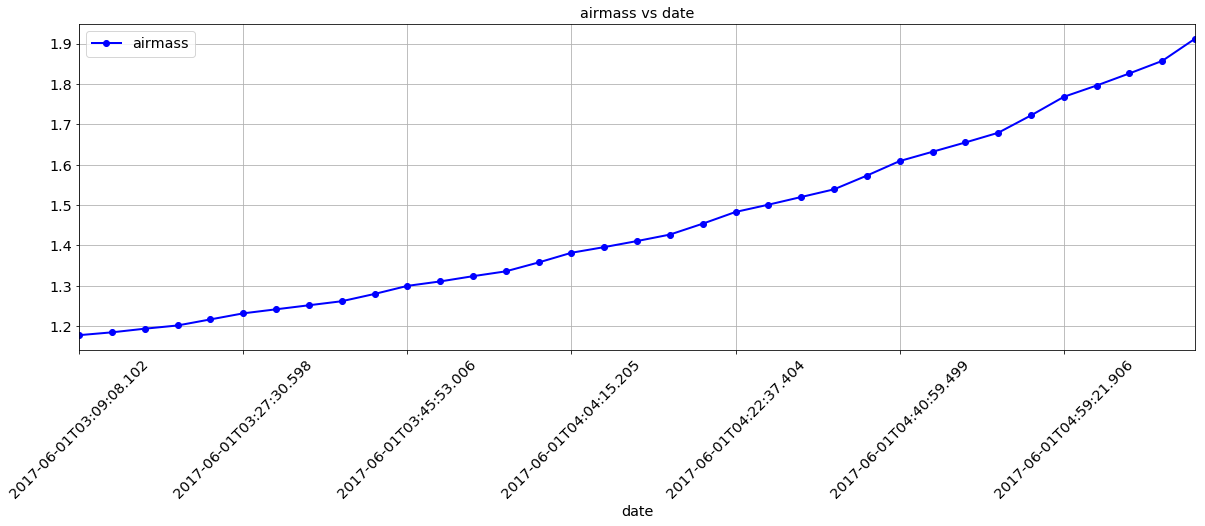

In [81]:
df.plot('date','airmass',figsize=(20,6),rot=45,grid=True,title='airmass vs date',color='b',marker='o',linewidth=2)


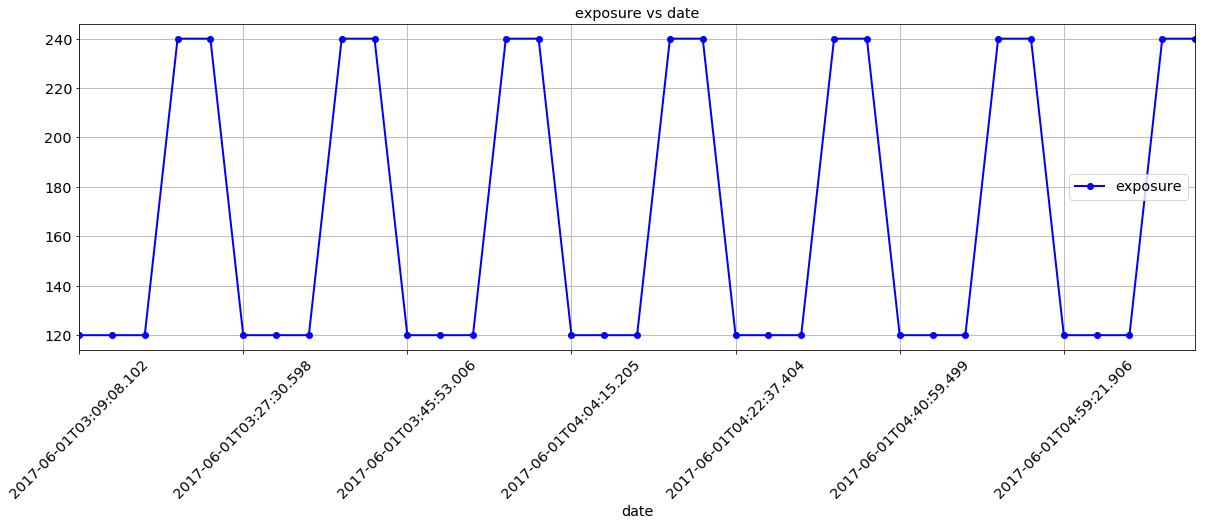

In [82]:
df.plot('date','exposure',figsize=(20,6),rot=45,grid=True,title='exposure vs date',color='b',marker='o',linewidth=2)

### Save pandas file


In [83]:
df.to_csv(pandaslogfile)